# Data pre-processing

### Load into X

In [ ]:
#####################################################################
############## read in kinetic data ##################################
#####################################################################

## read in kinetic data 
## into shape 
## x_train:  (data size, rows, columns)
## x_test:  (data size, rows, columns)

import numpy as np
import pandas as pd
import xlrd
import glob
#import numpy as np
import random
from matplotlib import pyplot as plt


# list of names of files 
file_names = []
# X is the data before preprocess
X = np.zeros((70, 70, 50))
# load in every excel file from kinetic_processed
for i, xls_file in enumerate(glob.glob("kinetic_processed/*")):
    # append into file_names list
    file_names.append(xls_file)
    #print(xls_file)
    # exclude column index and create panda dataframe
    dataframe = pd.read_excel(xls_file).iloc[:, 1:]
    # convert into numpy array and store into X
    matrix = dataframe.to_numpy()
    #print(matrix.shape)
    X[i] = matrix
    
print("total number of examples: ", X.shape[0])
print("dimension of one examples: ", X.shape[1], X.shape[2])
print("obtain array X with shape: ", X.shape)

### Load in Y

the length of Y:  70
any null data:  False
X.shape:  (66, 70, 50)
Y.shape:  (66,)


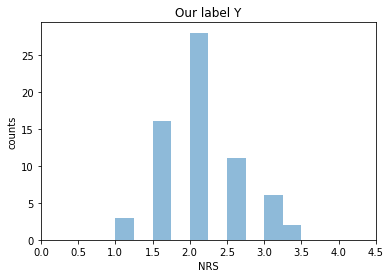

In [3]:
## load in excel file

# name of the label file 
excel_name = 'labels.xlsx'
# read in by panda
df = pd.read_excel(excel_name)
# only need the second column, where we store the score
Y = df.iloc[:, 2]

print("the length of Y: ", len(Y))
print("any null data: ", (Y==None).any())

## clean some missing data where we labeled -1  and display the label distribution 

# store our original data
X_temp = X
Y_temp = Y

# exclude the missing data, where I put -1 for NRS, 
X_clean = []
Y_clean = []

# if labeled as -1, not append that example/label
for i, j in enumerate(Y): 
    if j == -1: 
        pass 
    else: 
        X_clean.append(X[i])
        Y_clean.append(Y[i])

# store as numpy array and inspect the shape as X and Y
X = np.array(X_clean)
Y = np.array(Y_clean)
print("X.shape: ", X.shape) 
print("Y.shape: ", Y.shape)

# plot to see the distribution 
data = Y
plt.xlim([min(data)-1, max(data)+1])
plt.hist(data, alpha=0.5)
plt.title('Our label Y')
plt.xlabel('NRS')
plt.ylabel('counts')
plt.show()

### Data standardization

In [4]:

## function to inspect dataset X
def inspect_stat(X):
    print("-------------------------")
    print("shape: ", X.shape)
    print("min(): ", X.min())
    print("max(): ", X.max())
    print("mean(): ", X.mean())
    print("std(): ", X.std())
    print("-------------------------")

# normalize dataset X into X_nor 
X_nor = X / X.max() 

# standardize dataset X 
X_temp = X - X.min() 
X_std = X_temp / X.std()


# inspect dataset X 
print("X: ")
inspect_stat(X)
# inspect dataset X_nor 
print("X_nor: ")
inspect_stat(X_nor)
# inspect dataset X_std 
print("X_std: ")
inspect_stat(X_std)


X: 
-------------------------
shape:  (66, 70, 50)
min():  0.0
max():  2970.0
mean():  9.889324675324675
std():  43.13761616171395
-------------------------
X_nor: 
-------------------------
shape:  (66, 70, 50)
min():  0.0
max():  1.0
mean():  0.0033297389479207662
std():  0.014524449886098975
-------------------------
X_std: 
-------------------------
shape:  (66, 70, 50)
min():  0.0
max():  68.84942340963134
mean():  0.2292506066689373
std():  1.0
-------------------------


### Create Bi_Y from Y

In [5]:

## func to print the number for different scores 
from collections import Counter
def inspect_y(y): 
    print(Counter(y).keys()) # equals to list(set(words))
    print(Counter(y).values()) # counts the elements' frequency
    
# inspect value and their count in Y 
inspect_y(Y)

## make Y a binary list 
# if NRS score is higher than 2.5, make it 1 (lameness) 
# else, make it 0 (non-lameness)
def binarize(y): 
    b = [] 
    for i in y: 
        if i > 2.5: 
            b.append(1) 
        elif i <= 2.5: 
            b.append(0) 
        else: 
            return "invalid number"
    return b 

# binarize y 
bi_Y = binarize(Y)
print("bi_Y: ", len(bi_Y), bi_Y)
inspect_y(bi_Y)

dict_keys([2.0, 2.5, 3.0, 1.5, 1.0, 3.5])
dict_values([28, 11, 6, 16, 3, 2])
bi_Y:  66 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
dict_keys([0, 1])
dict_values([58, 8])


### Create Ti_Y from Y

In [6]:
## try to make three categories 
# 1: 1.0, 1.5 (18)
# 2: 2.0 (28) 
# 3: 2.5, 3.0, 3.5 (19)

def tri(y): 
    tri_y = [] 
    for i in y: 
        if i == 1.0 or i == 1.5: 
            tri_y.append(0) 
        elif i == 2.0: 
            tri_y.append(1) 
        elif i == 2.5 or i == 3.0 or i == 3.5: 
            tri_y.append(2) 
        else: 
            return "invalida number"
    return tri_y 

# tri y 
Ti_Y = tri(Y)
print("Ti_Y: ", len(Ti_Y), Ti_Y)

# categorize Ti_Y: this is required by tf
from keras.utils import to_categorical
Ti_Y = to_categorical(Ti_Y)
print("Ti_Y: ", Ti_Y.shape)


Ti_Y:  66 [1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2]
Ti_Y:  (66, 3)


### Split into x_train, x_test, y_train, y_test

In [16]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ## INPUT X
    X_std, 
    ## INPUT Y
    np.array(bi_Y), 
    ## SPLIT RATIO
    test_size=0.30, 
    random_state=1234)

# expand dimension
import tensorflow as tf
x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(46, 70, 50, 1)
(20, 70, 50, 1)
(46,)
(20,)


# Model and training

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization as BN
from keras import backend as k

In [18]:
"""remember to change last unit, activation function and loss metric if switch binary to categorical classification"""

# init input
input = Input(shape=(70, 50, 1))

"""conv"""
layer = Conv2D(2, (2, 2), activation='relu', padding='same')(input)
layer = Conv2D(4, (2, 2), activation='relu', padding='same')(layer)
layer = BN()(layer)
#layer = Conv2D(16, (4, 4), activation='relu', padding='same')(layer)
#layer = BN()(layer)
layer = MaxPooling2D(pool_size=(2,2))(layer)

"""flatten and dense"""
layer = Flatten()(layer)
#layer = Dense(512, activation='relu')(layer)
#layer = Dropout(0.2)(layer)
layer = Dense(128, activation='relu')(layer)
#layer = Dropout(0.2)(layer)
layer = Dense(8, activation='relu')(layer)
layer = Dense(1, activation='sigmoid')(layer)

# init model and plot summary
model = Model([input], layer)
model.summary()

# compile model 
model.compile(optimizer=keras.optimizers.Adam(),
              # define loss metric
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 70, 50, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 50, 2)         10        
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 50, 4)         36        
                                                                 
 batch_normalization_1 (Batc  (None, 70, 50, 4)        16        
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 25, 4)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3500)              0   

### Training 

In [29]:
# define callback to save best model
checkpoint_filepath = './best_model/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# store training histroy in history
history = model.fit(    
    x_train,
    y_train,
    epochs=200,
    validation_data=(x_test, y_test), 
    callbacks=[model_checkpoint_callback])

Epoch 1/200
2/2 [==============================] - 0s 142ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 2/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.9000
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.9000
Epoch 4/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.9000
Epoch 5/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3395 - val_accuracy: 0.9000
Epoch 6/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.9000
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3401 - val_accuracy: 0.9000
Epoch 8/200
2/2 [==

Epoch 58/200
2/2 [==============================] - 0s 49ms/step - loss: 6.1073e-05 - accuracy: 1.0000 - val_loss: 0.4277 - val_accuracy: 0.9000
Epoch 59/200
2/2 [==============================] - 0s 44ms/step - loss: 6.8131e-05 - accuracy: 1.0000 - val_loss: 0.4303 - val_accuracy: 0.9000
Epoch 60/200
2/2 [==============================] - 0s 42ms/step - loss: 5.2468e-05 - accuracy: 1.0000 - val_loss: 0.4330 - val_accuracy: 0.9000
Epoch 61/200
2/2 [==============================] - 0s 41ms/step - loss: 6.2798e-05 - accuracy: 1.0000 - val_loss: 0.4359 - val_accuracy: 0.9000
Epoch 62/200
2/2 [==============================] - 0s 40ms/step - loss: 5.2759e-05 - accuracy: 1.0000 - val_loss: 0.4387 - val_accuracy: 0.9000
Epoch 63/200
2/2 [==============================] - 0s 39ms/step - loss: 5.0989e-05 - accuracy: 1.0000 - val_loss: 0.4415 - val_accuracy: 0.9000
Epoch 64/200
2/2 [==============================] - 0s 41ms/step - loss: 4.9471e-05 - accuracy: 1.0000 - val_loss: 0.4444 - val_ac

2/2 [==============================] - 0s 45ms/step - loss: 2.5134e-05 - accuracy: 1.0000 - val_loss: 0.6191 - val_accuracy: 0.9000
Epoch 115/200
2/2 [==============================] - 0s 47ms/step - loss: 2.3477e-05 - accuracy: 1.0000 - val_loss: 0.6230 - val_accuracy: 0.9000
Epoch 116/200
2/2 [==============================] - 0s 44ms/step - loss: 2.4228e-05 - accuracy: 1.0000 - val_loss: 0.6269 - val_accuracy: 0.9000
Epoch 117/200
2/2 [==============================] - 0s 44ms/step - loss: 2.5316e-05 - accuracy: 1.0000 - val_loss: 0.6308 - val_accuracy: 0.9000
Epoch 118/200
2/2 [==============================] - 0s 43ms/step - loss: 1.9202e-05 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.9000
Epoch 119/200
2/2 [==============================] - 0s 42ms/step - loss: 2.7178e-05 - accuracy: 1.0000 - val_loss: 0.6391 - val_accuracy: 0.9000
Epoch 120/200
2/2 [==============================] - 0s 44ms/step - loss: 2.3997e-05 - accuracy: 1.0000 - val_loss: 0.6431 - val_accuracy:

2/2 [==============================] - 0s 47ms/step - loss: 1.1641e-05 - accuracy: 1.0000 - val_loss: 0.8397 - val_accuracy: 0.9000
Epoch 171/200
2/2 [==============================] - 0s 47ms/step - loss: 1.4807e-05 - accuracy: 1.0000 - val_loss: 0.8439 - val_accuracy: 0.9000
Epoch 172/200
2/2 [==============================] - 0s 46ms/step - loss: 1.4347e-05 - accuracy: 1.0000 - val_loss: 0.8475 - val_accuracy: 0.9000
Epoch 173/200
2/2 [==============================] - 0s 44ms/step - loss: 1.5279e-05 - accuracy: 1.0000 - val_loss: 0.8514 - val_accuracy: 0.9000
Epoch 174/200
2/2 [==============================] - 0s 43ms/step - loss: 1.3633e-05 - accuracy: 1.0000 - val_loss: 0.8552 - val_accuracy: 0.9000
Epoch 175/200
2/2 [==============================] - 0s 42ms/step - loss: 1.4058e-05 - accuracy: 1.0000 - val_loss: 0.8592 - val_accuracy: 0.9000
Epoch 176/200
2/2 [==============================] - 0s 41ms/step - loss: 1.3359e-05 - accuracy: 1.0000 - val_loss: 0.8628 - val_accuracy:

### Training and validation curves

--------------------------------------------------------------
Best training accuracy of:  1.0  at:  0

--------------------------------------------------------------
Best validation accuracy of:  0.8999999761581421  at:  0



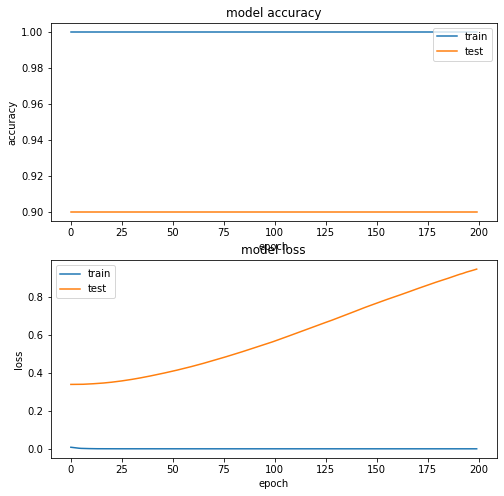

In [30]:

best_acc = max(history.history['accuracy'])
best_epoch_acc = history.history['accuracy'].index(best_acc)
print("--------------------------------------------------------------")
print("Best training accuracy of: ", best_acc, " at: ", best_epoch_acc)
print()

best_val = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val)
print("--------------------------------------------------------------")
print("Best validation accuracy of: ", best_val, " at: ", best_epoch)
print()

# plot training history
plt.figure(figsize=(8,8))

# plot history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# plot history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### F1 scores

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Ignore warning: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# Function to transform y_pred to binary 
def prob_to_pred(y_pred): 
    result = [] 
    for i in y_pred: 
        if i[0] >= 0.5: 
            result.append(1) 
        else: 
            result.append(0) 
    return np.array(result)

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy :\n ",
    accuracy_score(y_test,y_pred)*100)
      
    print("F1 :\n ",
    f1_score(y_test, y_pred, average='macro'))
    
# get prediction    
y_pred = model.predict(x_test)
# convert y_pred
y_pred = prob_to_pred(y_pred)
# print accuracy
cal_accuracy(y_test, y_pred)

1/1 [==============================] - 0s 24ms/step
Confusion Matrix: 
 [[18  0]
 [ 2  0]]
Accuracy :
  90.0
F1 :
  0.4736842105263158
